In [0]:
import pandas as pd
from google.colab import files
import io
#uploaded = files.upload()
#download and upload roman-emperors.csv from link below
#https://www.kaggle.com/lberder/roman-emperors-from-26-bc-to-395-ad

# Did the method you came to power effect the length of your total reign as Emperor?

In [0]:

df = pd.read_csv("https://raw.githubusercontent.com/SeanBackstrom/Romanemperorcsv/master/roman-emperors.csv")

In [32]:
df

,Index,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image
0,52,Galerius,CAESAR GALERIVS VALERIVS MAXIMIANVS AVGVSTVS,0260-01-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Romuliana,Moesia Superior,Appointment by Emperor,0305-05-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Natural Causes,Disease,Constantinian,Dominate,"birth, death, reign.end are estimates",NaN,https://public.opendatasoft.com/api/datasets/1...
1,57,Lucinius I,CAESAR GAIVS VALERIVS LICINIVS AVGVSTVS,0250-01-01T00:53:28+00:53,0325-03-01T00:53:28+00:53,Felix Romuliana,Moesia Superior,Birthright,0308-11-11T00:53:28+00:53,0324-09-18T00:53:28+00:53,Execution,Other Emperor,Constantinian,Dominate,"birth, death, are only estimates",NaN,https://public.opendatasoft.com/api/datasets/1...
2,33,Philip I,CAESAR MARCVS IVLIVS PHILIPPVS AVGVSTVS,0204-01-01T00:53:28+00:53,0249-10-01T00:53:28+00:53,Shahba,Syria,Seized Power,0244-02-14T00:53:28+00:53,0249-10-01T00:53:28+00:53,Execution,Other Emperor,Gordian,Principate,reign.end is only estimate,NaN,https://public.opendatasoft.com/api/datasets/1...
3,36,Trebonianus Gallus,CAESAR GAIVS VIBIVS TREBONIANVS GALLVS AVGVSTVS,0206-01-01T00:53:28+00:53,0253-08-15T00:53:28+00:53,NaN,Italia,Appointment by Army,0251-06-15T00:53:28+00:53,0253-08-15T00:53:28+00:53,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...
4,31,Balbinus,CAESAR DECIMVS CAELIVS CALVINVS BALBINVS PIVS ...,0178-01-01T00:53:28+00:53,0238-07-29T00:53:28+00:53,NaN,Unknown,Appointment by Senate,0238-04-22T00:53:28+00:53,0238-07-29T00:53:28+00:53,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,37,Aemilian,CAESAR MARCVS AEMILIVS AEMILIANVS AVGVSTVS,0207-01-01T00:53:28+00:53,0253-10-15T00:53:28+00:53,NaN,Africa,Appointment by Army,0253-08-15T00:53:28+00:53,0253-10-15T00:53:28+00:53,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...
64,56,Maximinus II,CAESAR GALERIVS VALERIVS MAXIMINVS AVGVSTVS,0270-11-20T00:53:28+00:53,0313-08-01T00:53:28+00:53,NaN,Dacia Aureliana,Birthright,0311-05-01T00:53:28+00:53,0313-08-01T00:53:28+00:53,Execution,Other Emperor,Constantinian,Dominate,"death, reign.end are only estimates",NaN,https://public.opendatasoft.com/api/datasets/1...
65,55,Maxentius,MARCVS AVRELIVS VALERIVS MAXENTIVS AVGVSTVS,0278-01-01T00:53:28+00:53,0312-10-08T00:53:28+00:53,NaN,Unknown,Birthright,0306-10-08T00:53:28+00:53,0312-10-08T00:53:28+00:53,Execution,Other Emperor,Constantinian,Dominate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...
66,32,Gordian III,CAESAR MARCVS ANTONIVS GORDIANVS AVGVSTVS,0225-01-20T00:53:28+00:53,0244-02-11T00:53:28+00:53,Rome,Italia,Appointment by Senate,0238-04-22T00:53:28+00:53,0244-02-11T00:53:28+00:53,Died in Battle,Opposing Army,Gordian,Principate,NaN,NaN,https://public.opendatasoft.com/api/datasets/1...


In [0]:
#get rid of extra tails and columns
df['Reign Start'] = df['Reign Start'].map(lambda x: str(x)[:-21])


In [0]:
df = df.drop('Image', axis=1)

In [0]:
df = df.drop('Verif', axis=1)

In [0]:
df.sort_values(by=['Index'])
#Set index to index column
df = df.set_index('Index')

df = df.sort_index()

In [0]:
#get rid of extra tails
df['Reign End'] = df['Reign End'].map(lambda x: str(x)[:-21])

In [0]:
df['Birth'] = df['Birth'].map(lambda x: str(x)[:-21])

In [0]:
df['Death'] = df['Death'].map(lambda x: str(x)[:-21])

In [40]:
df['Reign End']

Index
1     0014
2     0037
3     0041
4     0054
5     0068
      ... 
64    0375
65    0378
66    0383
67    0392
68    0395
Name: Reign End, Length: 68, dtype: object

In [41]:
df.sort_values(by=['Index'])

,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes
Index,,,,,,,,,,,,,,
1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062,0014,Rome,Italia,Birthright,0026,0014,Assassination,Wife,Julio-Claudian,Principate,"birth, reign.start are BCE. Assign negative fo..."
2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041,0037,Rome,Italia,Birthright,0014,0037,Assassination,Other Emperor,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...
3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012,0041,Antitum,Italia,Birthright,0037,0041,Assassination,Senate,Julio-Claudian,Principate,NaN
4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009,0054,Lugdunum,Gallia Lugdunensis,Birthright,0041,0054,Assassination,Wife,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...
5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037,0068,Antitum,Italia,Birthright,0054,0068,Suicide,Senate,Julio-Claudian,Principate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Valentinian I,FLAVIVS VALENTINIANVS AVGVSTVS,0321,0375,Cibalae,Pannonia,Election,0364,0375,Natural Causes,Aneurism,Valentinian,Dominate,NaN
65,Valens,FLAVIVS IVLIVS VALENS AVGVSTVS,0328,0378,Cibalae,Pannonia,Birthright,0364,0378,Died in Battle,Opposing Army,Valentinian,Dominate,birth is only estimate.
66,Gratian,FLAVIVS GRATIANVS AVGVSTVS,0359,0383,Sirmium,Pannonia,Birthright,0367,0383,Assassination,Own Army,Valentinian,Dominate,birth may also be 0359-05-23


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
df.dtypes

Name              object
Full Name         object
Birth             object
Death             object
Birth City        object
Birth Province    object
Succession        object
Reign Start       object
Reign End         object
Cause             object
Killer            object
Dynasty           object
Era               object
Notes             object
dtype: object

In [0]:
#convert str to int/floats
df['Birth'] = pd.to_numeric(df['Birth'])
df['Death'] = pd.to_numeric(df['Death'])
df['Reign Start'] = pd.to_numeric(df['Reign Start'])
df['Reign End'] = pd.to_numeric(df['Reign End'])

In [45]:
#set BC years to - numbers
df['Reign Start'][1] = -26


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df['Birth'][1] = -62
df['Birth'][2] = -41
df['Birth'][3] = -12
df['Birth'][4] = -9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [0]:
#add new column for research
df['Length Of Reign'] = df['Reign End'] - df['Reign Start']

In [48]:
df['Length Of Reign']

Index
1     40
2     23
3      4
4     13
5     14
      ..
64    11
65    14
66    16
67    17
68    16
Name: Length Of Reign, Length: 68, dtype: int64

# All Clean - Time to graph

In [49]:
#I intend to graph this column. I want to see the different options
df['Succession'].unique()

array(['Birthright', 'Seized Power', 'Appointment by Praetorian Guard',
       'Appointment by Senate', 'Purchase', 'Appointment by Army',
       'Appointment by Emperor', 'Election'], dtype=object)

In [50]:
#Average the length of reign depending on succession
df.groupby(['Succession'])['Length Of Reign'].mean()

Succession
Appointment by Army                 3.285714
Appointment by Emperor              7.000000
Appointment by Praetorian Guard     1.000000
Appointment by Senate               1.285714
Birthright                         12.371429
Election                           11.000000
Purchase                            0.000000
Seized Power                        5.900000
Name: Length Of Reign, dtype: float64

In [0]:
#Take data points above and place in ordered list below for graphing
fakesuccmeans = pd.Series([ 12.37, 11, 7, 5.9,3.2,1.28,1],index=range(1,8))

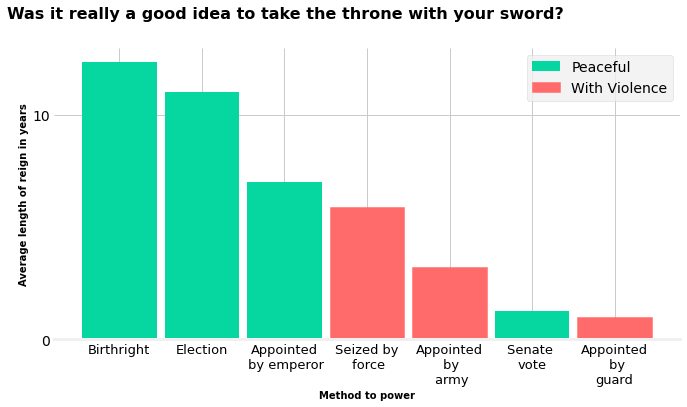

In [52]:
#Increase size of graph
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Turn on the Grid: Change the stylesheet that we're working with

# White figure background
fig.patch.set_facecolor('white')

# White axes background
ax.set_facecolor('white')

# put bars on the chart
barlist = ax.bar(x=range(1,8,1), height=fakesuccmeans, color='#06d6a0', width=.9)
#Set color of violent successions
barlist[3].set_color('#ff6b6b')
barlist[4].set_color('#ff6b6b')
barlist[6].set_color('#ff6b6b')
# Add Title
ax.set_title("Was it really a good idea to take the throne with your sword?", fontsize=16, fontweight='bold', x=.37, y=1.08)


# set x and y axis labels
ax.set_xlabel('Method to power', fontsize=10, fontweight='bold')
ax.set_ylabel('Average length of reign in years', fontsize=10, fontweight='bold')

# x axis tick marks and tick lables

ax.set_xticklabels(['', 'Birthright','Election', 'Appointed\n by emperor','Seized by\n force','Appointed\n by\n army',
                    'Senate \nvote','Appointed\n by\nguard',], fontsize=13)
# y axis tick marks and tick lables
ax.set_yticks(range(0,16,10))

# Turn off some of the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#create legend
ax.legend(barlist[2:4], ['Peaceful', 'With Violence', 'd','d'])

#save graph HD

#plt.tight_layout()
#plt.savefig("REManyDeaths2.pdf")
plt.show()

In [0]:
#Create list of only violent successions
violist = ['Appointment by Army','Appointment by Praetorian Guard','Seized Power']
violencebool = df['Succession'].isin(violist)

In [54]:
#Check the ways emperors died
df['Cause'].unique()

array(['Assassination', 'Suicide', 'Natural Causes', 'Execution',
       'Died in Battle', 'Captivity', 'Unknown'], dtype=object)

In [0]:
#create a filter of emperoers who died violently
violentdeathlist = ['Assassination', 'Suicide','Execution','Died in Battle', 'Captivity'] 
violentdeathbool = df['Cause'].isin(violentdeathlist)

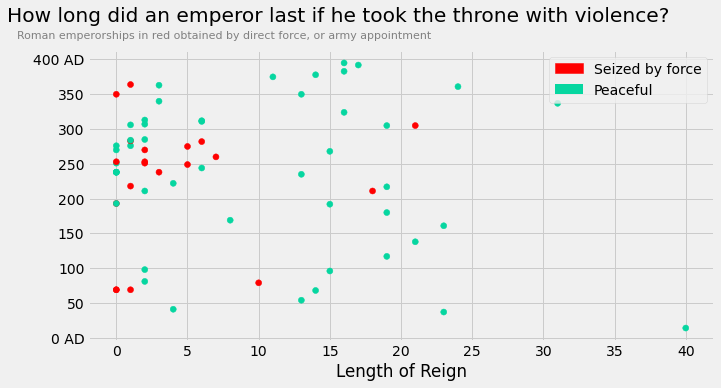

In [56]:
from matplotlib.patches import Patch
#Make color coding
col = np.where(violencebool == True,'r', '#06d6a0')
#Create plot
plt.scatter(df['Length Of Reign'], df['Reign End'], c=col)
#title
plt.title("How long did an emperor last if he took the throne with violence?\n",x=0.4, y=1)
plt.text(s='Roman emperorships in red obtained by direct force, or army appointment', y=430, x=-7, fontsize=11, color='gray')
plt.xlabel('Length of Reign')
#Create color legend
legend_elements = [
                   Patch(facecolor='red', edgecolor='r',
                         label='Seized by force'),
                   Patch(facecolor='#06d6a0', label='Peaceful')]
plt.legend(handles = legend_elements)
#create ticks                        
plt.yticks(range(0,410,50),labels=['0 AD','50','100','150','200','250','300','350','400 AD'])

#save
#plt.tight_layout()
#plt.savefig("REManyDeaths3.pdf")

plt.show()

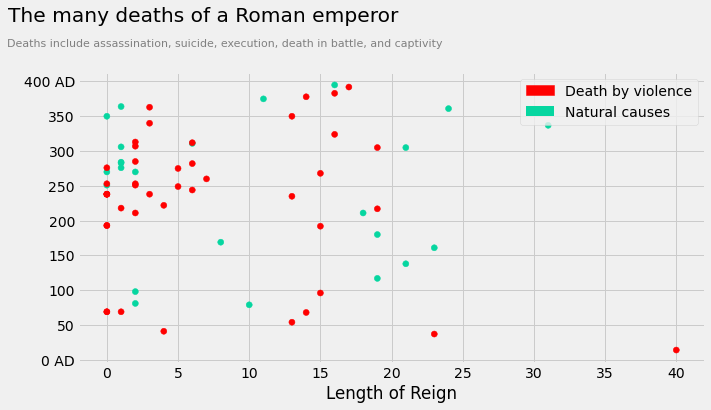

In [57]:
#filter color onto graph
col = np.where(violentdeathbool == True,'r', '#06d6a0')
#plot
plt.scatter(df['Length Of Reign'], df['Reign End'], c=col)
#title
plt.title("The many deaths of a Roman emperor\n\n", x=0.2, y=1)
# Add subtitle
plt.text(s='Deaths include assassination, suicide, execution, death in battle, and captivity', y=450, x=-7, fontsize=11, color='gray')

plt.xlabel('Length of Reign')

plt.yticks(range(0,410,50),labels=['0 AD','50','100','150','200','250','300','350','400 AD'])
#create color legend
legend_elements = [
                   Patch(facecolor='red', edgecolor='r',
                         label='Death by violence'),
                   Patch(facecolor='#06d6a0', label='Natural causes')]
plt.legend(handles = legend_elements) 
#savefile
#plt.tight_layout()
#plt.savefig("REManyDeaths.pdf")
plt.show()


In [58]:
#This is exploring data for some bonus stats in the blog

#this is all emperors who lived less tahn 1 year as Emperor
df[df['Length Of Reign'] == 0]


,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Length Of Reign
Index,,,,,,,,,,,,,,,
7,Otho,MARCVS SALVIVS OTHO CAESAR AVGVSTVS,32.0,69,Terentinum,Italia,Appointment by Praetorian Guard,69,69,Suicide,Other Emperor,Flavian,Principate,NaN,0
8,Vitellius,AVLVS VITELLIVS GERMANICVS AVGVSTVS,15.0,69,Rome,Italia,Seized Power,69,69,Assassination,Other Emperor,Flavian,Principate,NaN,0
19,Pertinax,CAESAR PVBLIVS HELVIVS PERTINAX AVGVSTVS,126.0,193,Alba,Italia,Appointment by Praetorian Guard,193,193,Assassination,Praetorian Guard,Severan,Principate,NaN,0
20,Didius Julianus,CAESAR MARCVS DIDIVS SEVERVS IVLIANVS AVGVSTVS,133.0,193,Milan,Italia,Purchase,193,193,Execution,Senate,Severan,Principate,birth could also be 0137-02-02,0
28,Gordian I,CAESAR MARCVS ANTONIVS GORDIANVS SEMPRONIANVS ...,159.0,238,NaN,Phrygia,Appointment by Senate,238,238,Suicide,Other Emperor,Gordian,Principate,birth is only estimate.,0
29,Gordian II,CAESAR MARCVS ANTONIVS GORDIANVS SEMPRONIANVS ...,192.0,238,NaN,Unknown,Appointment by Senate,238,238,Execution,Other Emperor,Gordian,Principate,birth is only estimate.,0
30,Pupienus,CAESAR MARCVS CLODIVS PVPIENVS MAXIMVS AVGVSTVS,178.0,238,NaN,Unknown,Appointment by Senate,238,238,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,0
31,Balbinus,CAESAR DECIMVS CAELIVS CALVINVS BALBINVS PIVS ...,178.0,238,NaN,Unknown,Appointment by Senate,238,238,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,0
35,Hostilian,CAESAR CAIVS VALENS HOSTILIANVS MESSIVS QVINTV...,230.0,251,Sirmium,Pannonia,Birthright,251,251,Natural Causes,Disease,Gordian,Principate,birth is only estimate. Reign.end is only esti...,0
